<a href="https://colab.research.google.com/github/taba1/test1/blob/master/rbc55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autograd

In [ ]:
!pip install matplotlib
!pip install scipy
!pip install matplotlib
!pip install --upgrade matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
!python /content/HANK_EGM.py

In [ ]:
# RBC.pyファイルのパスを指定
file_path = "/content/HANK_EGM.py"

# ファイルを開いて中身を表示
with open(file_path, 'r') as file:
    code_content = file.read()

# 中身を表示
print(code_content)

Steady state: [ 1.      1.0204 45.6371  4.6103  3.6975  1.      1.0204 45.6371  4.6103
  3.6975]
Debug - X_lag [ 1.      1.0204 45.6371  4.6103  3.6975  1.      1.0204 45.6371  4.6103
  3.6975]
Debug - X [ 1.      1.0204 45.6371  4.6103  3.6975  1.      1.0204 45.6371  4.6103
  3.6975]
Debug - X_prime [ 1.      1.0204 45.6371  4.6103  3.6975  1.      1.0204 45.6371  4.6103
  3.6975]
Debug - X_lag [ 1.      1.0204 45.6371  4.6103  3.6975  1.      1.0204 45.6371  4.6103
  3.6975]
Debug - X [ 1.      1.0204 45.6371  4.6103  3.6975  1.      1.0204 45.6371  4.6103
  3.6975]
Debug - X_prime Autograd ArrayBox with value [ 1.      1.0204 45.6371  4.6103  3.6975  1.      1.0204 45.6371  4.6103
  3.6975]
Debug - X_lag [ 1.      1.0204 45.6371  4.6103  3.6975  1.      1.0204 45.6371  4.6103
  3.6975]
Debug - X Autograd ArrayBox with value [ 1.      1.0204 45.6371  4.6103  3.6975  1.      1.0204 45.6371  4.6103
  3.6975]
Debug - X_prime [ 1.      1.0204 45.6371  4.6103  3.6975  1.      1.0204 45.6

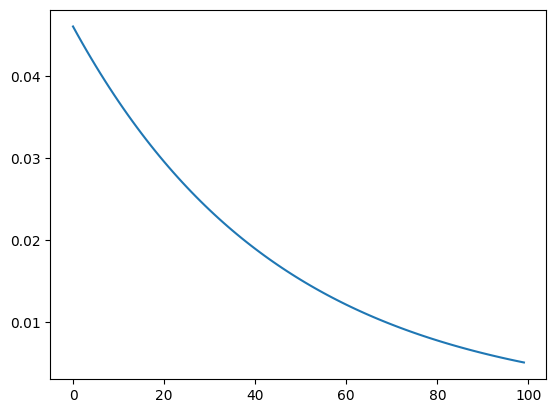

In [ ]:
import autograd.numpy as np
from autograd import jacobian
np.set_printoptions(suppress=True,precision=4)

from Support import SolveSystem

# Indexing
nX = 10
nEps = 1
iZ, iR, iK, iY, iC, iZf, iRf, iKf, iYf, iCf= range(nX)


# Parameters
alpha = 0.4
beta = 0.98
gamma = 2.0
delta = 0.02
rho = 0.95

alphaf = 0.4
betaf = 0.98
gammaf = 2.0
deltaf = 0.02
rhof = 0.95



def SteadyState():
    Z = 1.
    R = 1/beta
    K = ((R-1+delta)/alpha)**(1./(alpha-1))
    Y = K**alpha
    C = Y - delta*K

    Zf = 1.
    Rf = 1/betaf
    Kf = ((R-1+deltaf)/alphaf)**(1./(alphaf-1))
    Yf = Kf**alphaf
    Cf = Yf - deltaf*Kf


    X = np.zeros(nX)
    X[[iZ, iR, iK, iY, iC,iZf, iRf, iKf, iYf, iCf]] = (Z, R, K, Y, C,Zf,Rf,Kf,Yf,Cf)
    return X

X_SS = SteadyState()
epsilon_SS = 0.0
epsilonf_SS = 0.0
print("Steady state: {}".format(X_SS))

# Model equations
def F(X_Lag,X,X_Prime,epsilon,epsilonf):

    # Unpack
    Z, R, K, Y, C, Zf, Rf, Kf, Yf, Cf = X
    Z_L, R_L, K_L, Y_L, C_L,Zf_L, Rf_L, Kf_L, Yf_L, Cf_L = X_Lag
    Z_P, R_P, K_P, Y_P, C_P,Zf_P, Rf_P, Kf_P, Yf_P, Cf_P = X_Prime

    print("Debug - X_lag",X_Lag)
    print("Debug - X",X )
    print("Debug - X_prime",X_Prime)

    return np.hstack((
            beta * R_P * C_P**(-gamma) * C**gamma - 1.0, # Euler equation
            alpha * Z  * K_L **(alpha-1) + 1 -delta - R, # MPK
            (1-delta) * K_L + Y - C - K,# Aggregate resource constraint
            Z * K_L**alpha - Y,# Production function
            rho * np.log(Z_L) + epsilon - np.log(Z),# TFP evolution

            betaf * Rf_P * Cf_P**(-gamma) * Cf**gamma - 1.0, # Euler equation
            alphaf * Zf  * Kf_L **(alphaf-1) + 1 -deltaf - Rf, # MPK
            (1-deltaf) * Kf_L + Yf - Cf - Kf,# Aggregate resource constraint
            Zf * Kf_L**alphaf - Yf,# Production function
            rhof * np.log(Zf_L) + epsilonf - np.log(Zf)# TFP evolution
            ))


# Check steady state
assert( np.allclose( F(X_SS,X_SS,X_SS,epsilon_SS,epsilonf_SS) , np.zeros(nX)))


# Linearize
A = jacobian(lambda x: F(X_SS,X_SS,x,epsilon_SS,epsilonf_SS))(X_SS)
B = jacobian(lambda x: F(X_SS,x,X_SS,epsilon_SS,epsilonf_SS))(X_SS)
C = jacobian(lambda x: F(x,X_SS,X_SS,epsilon_SS,epsilonf_SS))(X_SS)
E = jacobian(lambda x: F(X_SS, X_SS, X_SS, x, epsilonf_SS))(epsilon_SS)



P, Q = SolveSystem(A,B,C,E)


# Calculate an impulse response
IRF_RBC = np.zeros((nX,100))
IRF_RBC[:,0] = Q * 0.01

for t in range(1,100):
    IRF_RBC[:,t] = P@IRF_RBC[:,t-1]


# This material below runs only if this file is executed as a script
if __name__ == "__main__":


    print("A: {}".format(A))
    print("B: {}".format(B))
    print("C: {}".format(C))
    print("E: {}".format(E))

    import matplotlib.pyplot as plt
    plt.plot(IRF_RBC[iY,:])